In [29]:
# Imports
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd

ems_2020_rel = pd.read_csv('../graphA/mergeN.csv', usecols=['Area','2020rel'])
ems_2020_relTREES = pd.read_csv('../graphA/mergeY.csv', usecols=['Area','2020rel'])



In [30]:

print(ems_2020_rel)

                    Area   2020rel
0            Afghanistan  0.014470
1                Albania  0.183416
2                Algeria  0.073687
3                 Angola  0.021569
4    Antigua and Barbuda  1.065982
..                   ...       ...
159           Uzbekistan  0.258963
160              Vanuatu  0.013403
161                Yemen  0.031483
162               Zambia  0.008145
163             Zimbabwe  0.025730

[164 rows x 2 columns]


/tmp/ipykernel_6573/569832872.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


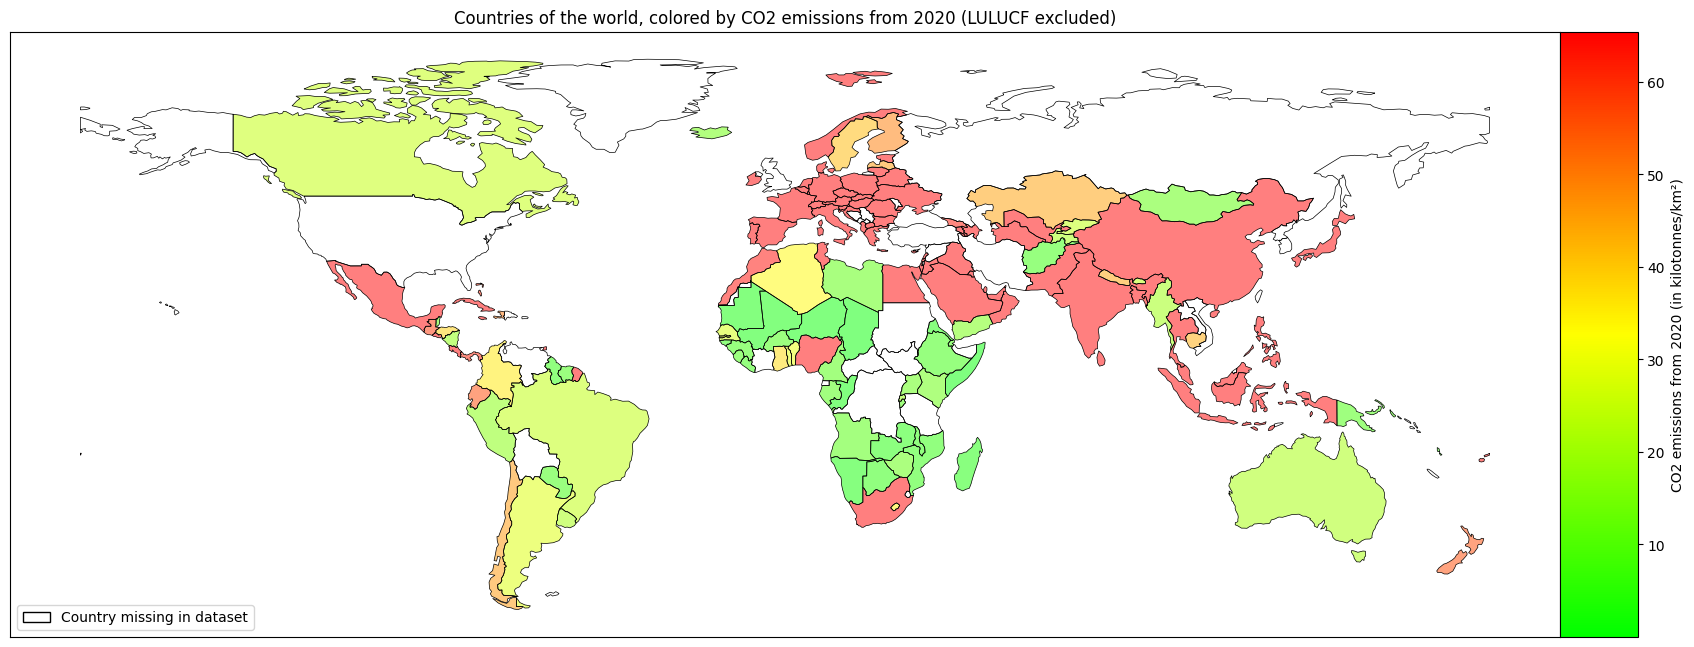

In [31]:
#no trees

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# drop "Antarctica" and "Seven seas" from the dataframe
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, 1, 0), (1, 1, 0), (1, 0, 0)],
    N=256
)

# normalize the '2020rel' values to the range [0, 1] for the colormap
norm = plt.Normalize(ems_2020_rel['2020rel'].min(), ems_2020_rel['2020rel'].median())

# loop over the countries in the world dataframe
for country_name in world["name"].unique():
    # grab all countries that belong to the continent
    country = world[world["name"] == country_name]

    # check if the country is in the ems_2020_rel dataframe
    if country_name in ems_2020_rel['Area'].values:
        # get the '2020rel' value for the country
        rel_value = ems_2020_rel[ems_2020_rel['Area'] == country_name]['2020rel'].values[0]

        # get the color corresponding to the '2020rel' value
        color = cmap(norm(rel_value))
    else:
        # if the country is not in the ems_2020_rel dataframe, use white color
        color = 'white'

    # plot the country with the color
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title and subtitle
plt.title("Countries of the world, colored by CO2 emissions from 2020 (LULUCF excluded)")


# create a ScalarMappable for the colorbar with unnormalized values
norm_cbar = plt.Normalize(ems_2020_rel['2020rel'].min(), ems_2020_rel['2020rel'].max())
sm_cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm_cbar)
sm_cbar.set_array([])
cbar = fig.colorbar(sm_cbar, orientation="vertical", fraction=0.036, pad=0.1, aspect = 30, cax=ax.inset_axes([1.0, 0, 0.05, 1]))

cbar.set_label("CO2 emissions from 2020 (in kilotonnes/km²)")

# create custom legend
patch1 = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
plt.legend(handles=[patch1], loc='lower left')

plt.show()


/tmp/ipykernel_6573/532717123.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


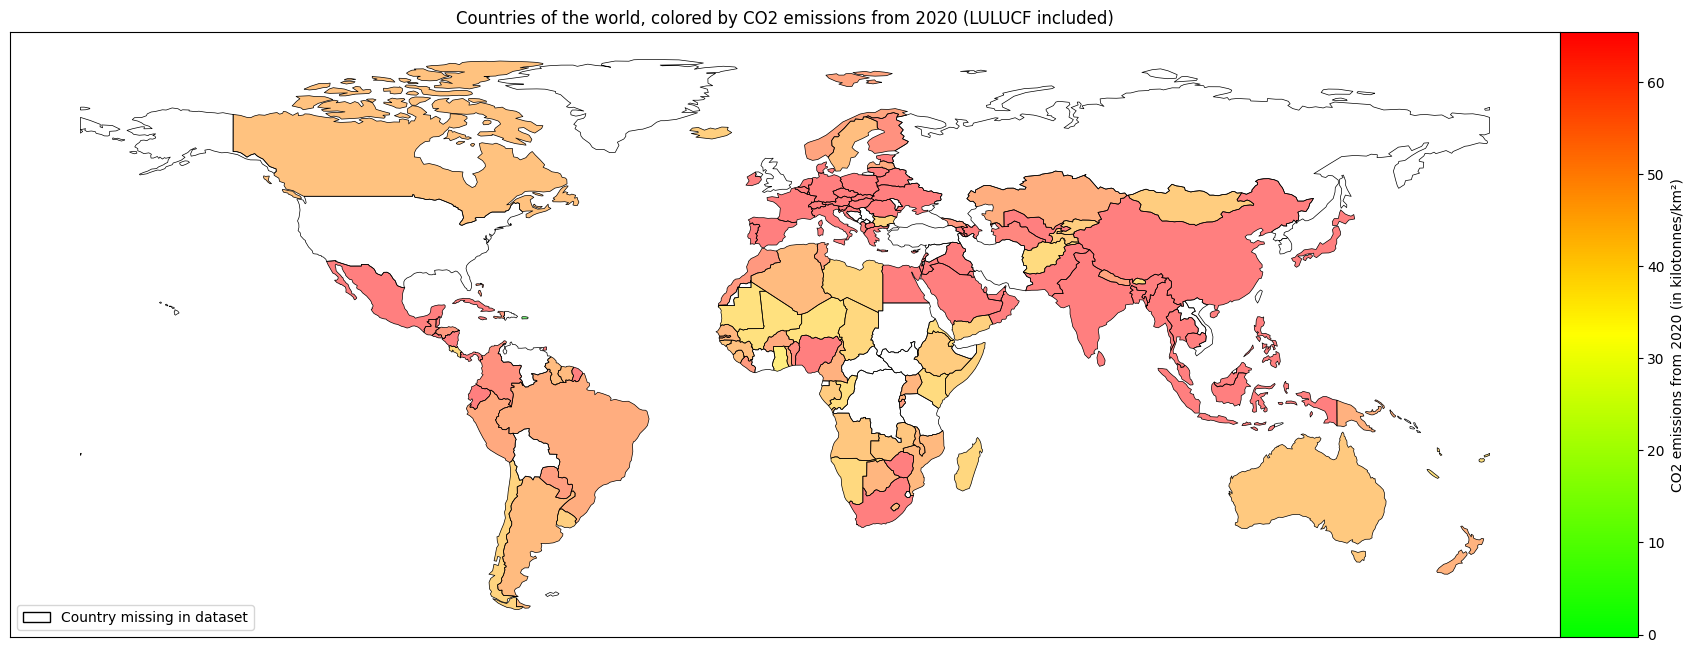

-0.2888799978031634 65.46639231843575


In [32]:
#TREEES

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# drop "Antarctica" and "Seven seas" from the dataframe
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, 1, 0), (1, 1, 0), (1, 0, 0)],
    N=256
)

# normalize the '2020rel' values to the range [0, 1] for the colormap
norm = plt.Normalize(ems_2020_relTREES['2020rel'].min(), ems_2020_relTREES['2020rel'].median())

# loop over the countries in the world dataframe
for country_name in world["name"].unique():
    # grab all countries that belong to the continent
    country = world[world["name"] == country_name]

    # check if the country is in the ems_2020_relTREES dataframe
    if country_name in ems_2020_relTREES['Area'].values:
        # get the '2020rel' value for the country
        rel_value = ems_2020_relTREES[ems_2020_relTREES['Area'] == country_name]['2020rel'].values[0]

        # get the color corresponding to the '2020rel' value
        color = cmap(norm(rel_value))
    else:
        # if the country is not in the ems_2020_relTREES dataframe, use white color
        color = 'white'

    # plot the country with the color
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title and subtitle
plt.title("Countries of the world, colored by CO2 emissions from 2020 (LULUCF included)")


# create a ScalarMappable for the colorbar with unnormalized values
norm_cbar = plt.Normalize(ems_2020_relTREES['2020rel'].min(), ems_2020_relTREES['2020rel'].max())
sm_cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm_cbar)
sm_cbar.set_array([])
cbar = fig.colorbar(sm_cbar, orientation="vertical", fraction=0.036, pad=0.1, aspect = 30, cax=ax.inset_axes([1.0, 0, 0.05, 1]))

cbar.set_label("CO2 emissions from 2020 (in kilotonnes/km²)")

# create custom legend
patch1 = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
plt.legend(handles=[patch1], loc='lower left')

plt.show()
print (ems_2020_relTREES['2020rel'].min(), ems_2020_relTREES['2020rel'].max())